In [1]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("Most popular 1000 Youtube videos.csv")

# Вывод первых строк данных
print(df.head())

   rank                                              Video    Video views  \
0     1  Lil Nas X - Old Town Road (Official Movie) ft....     54,071,677   
1     2  20 Tennis shots if they were not filmed, NOBOD...      3,471,237   
2     3                 JoJo Siwa - Karma (Official Video)     34,206,747   
3     4    David Kushner - Daylight (Official Music Video)     18,558,390   
4     5  Wiz Khalifa - See You Again ft. Charlie Puth [...  6,547,981,039   

        Likes Dislikes Category  published  
0   3,497,955   78,799    Music       2019  
1      19,023      859      NaN       2017  
2     293,563      NaN    Music       2024  
3     680,732      NaN    Music       2023  
4  44,428,537      NaN    Music       2015  


In [2]:
# Удаление строк с пропусками
df = df.dropna()

# Проверка результата
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 0 to 998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         511 non-null    int64 
 1   Video        511 non-null    object
 2   Video views  511 non-null    object
 3   Likes        511 non-null    object
 4   Dislikes     511 non-null    object
 5   Category     511 non-null    object
 6   published    511 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.9+ KB
None


Разделение данных на обучающую и тестовую выборки

In [3]:
from sklearn.model_selection import train_test_split

# Признаки (X) и целевая переменная (y)
X = df[['Video views', 'Likes', 'Dislikes']]  # Используем числовые признаки
y = df['Category']  # Целевая переменная

# Преобразуем числовые признаки из строк в числа
X['Video views'] = X['Video views'].str.replace(',', '').astype(int)
X['Likes'] = X['Likes'].str.replace(',', '').astype(int)
X['Dislikes'] = X['Dislikes'].str.replace(',', '').astype(int)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров выборок
print(f"Обучающая выборка: {X_train.shape}, Тестовая выборка: {X_test.shape}")

Обучающая выборка: (408, 3), Тестовая выборка: (103, 3)


/var/folders/cw/4tjd167j4wz1b2l6dw4jq1zh0000gn/T/ipykernel_8882/3342126156.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Video views'] = X['Video views'].str.replace(',', '').astype(int)
/var/folders/cw/4tjd167j4wz1b2l6dw4jq1zh0000gn/T/ipykernel_8882/3342126156.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Likes'] = X['Likes'].str.replace(',', '').astype(int)
/var/folders/cw/4tjd167j4wz1b2l6dw4jq1zh0000gn/T/ipykernel_8882/3342126156.py:10: SettingWithCopyWarning: 
A value is trying to be s

Обучение модели логистической регрессии

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Масштабирование данных (логистическая регрессия чувствительна к масштабу)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
model.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

Оценка качества модели

Accuracy: 0.40
Confusion Matrix:


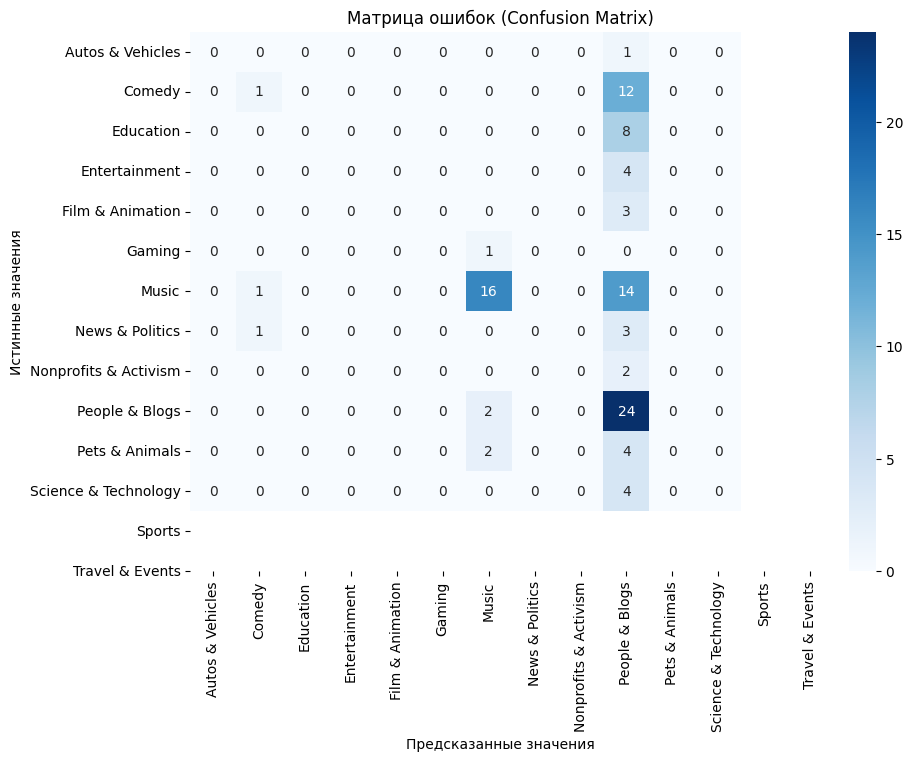

Classification Report:
                       precision    recall  f1-score   support

     Autos & Vehicles       0.00      0.00      0.00         1
               Comedy       0.33      0.08      0.12        13
        Entertainment       0.00      0.00      0.00         8
     Film & Animation       0.00      0.00      0.00         4
               Gaming       0.00      0.00      0.00         3
        Howto & Style       0.00      0.00      0.00         1
                Music       0.76      0.52      0.62        31
      News & Politics       0.00      0.00      0.00         4
Nonprofits & Activism       0.00      0.00      0.00         2
       People & Blogs       0.30      0.92      0.46        26
       Pets & Animals       0.00      0.00      0.00         6
               Sports       0.00      0.00      0.00         4

             accuracy                           0.40       103
            macro avg       0.12      0.13      0.10       103
         weighted avg       0.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оценка точности (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Матрица ошибок (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
# Создаем тепловую карту для матрицы ошибок
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)

# Добавляем подписи осей и заголовок
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок (Confusion Matrix)')

# Отображаем график
plt.show()



# Отчет о классификации (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

## Обучение модели по методу опорных векторов

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Лучшие параметры: {'estimator__C': 10, 'estimator__degree': 2, 'estimator__gamma': 'auto', 'estimator__kernel': 'rbf'}
Лучшая точность на кросс-валидации: 0.42899728997289976
Accuracy на тестовых данных: 0.41
Матрица ошибок:


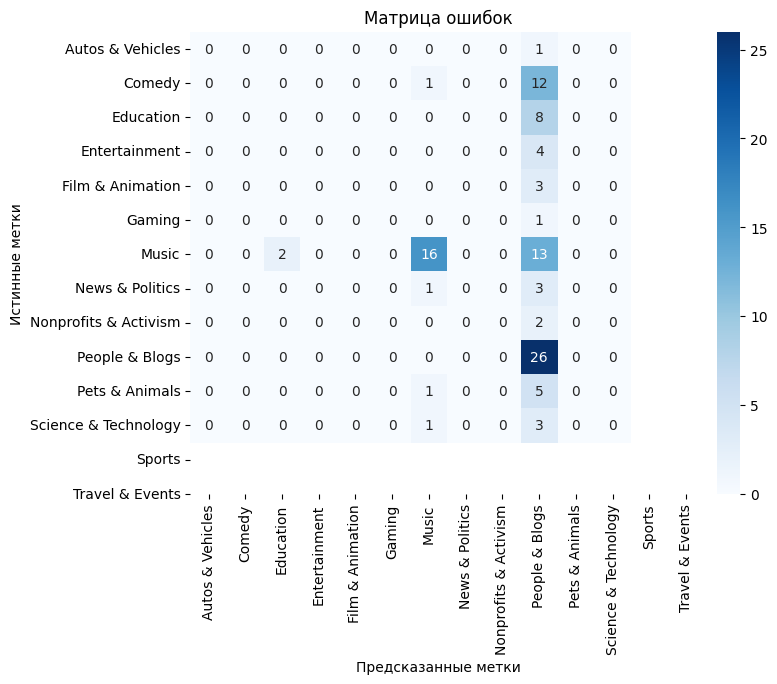

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Определяем параметры для поиска
param_grid = {
    'estimator__kernel': ['linear', 'rbf', 'poly'],
    'estimator__C': [0.1, 1, 10],
    'estimator__gamma': ['scale', 'auto'],
    'estimator__degree': [2, 3, 4]
}

# Создаем модель и GridSearchCV
svm_model = OneVsOneClassifier(SVC())
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Обучаем GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Выводим лучшие параметры и точность
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на кросс-валидации:", grid_search.best_score_)

# Оцениваем модель на тестовых данных
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy на тестовых данных: {accuracy_svm:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
# print(conf_matrix)
# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()

По результатам кросс-валидации видно, что лучшие результаты показало ядро RBF с параметром auto (для немасштабированных данных, что странно) 

Обучим модель по методу опорных векторов с использованием ядра RBF

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.multiclass import OneVsOneClassifier

# Создаем модель SVM с использованием логики "один против одного" (OvO) и ядром RBF
svm_model = OneVsOneClassifier(SVC(kernel='rbf', gamma='auto'))

# Обучаем модель на обучающей выборке
svm_model.fit(X_train_scaled, y_train)

# Предсказываем метки классов для тестовой выборки
y_pred_svm = svm_model.predict(X_test_scaled)

# Оцениваем точность модели
accuracy_1 = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_1:.2f}")

Accuracy: 0.40


Значение меньше, чем при кросс-валидации, следовательно, нужно ядро не RBF

Идущий далее код это более быстрая проверка текущей тестовой выборки и расчет метрики для нее без кросс-валидации.

In [8]:
# from sklearn.svm import SVC
# from sklearn.multiclass import OneVsOneClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix
# import itertools
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Определяем параметры для поиска
# param_grid = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10],
#     'gamma': ['scale', 'auto'],
#     'degree': [2, 3, 4]
# }

# # Генерируем все комбинации параметров
# param_combinations = list(itertools.product(param_grid['kernel'], param_grid['C'], param_grid['gamma'], param_grid['degree']))

# # Переменные для хранения лучших параметров и точности
# best_accuracy = 0
# best_params = None
# best_conf_matrix = None

# # Перебираем все комбинации параметров
# for kernel, C, gamma, degree in param_combinations:
#     # Создаем модель SVM с текущими параметрами
#     svm_model = OneVsOneClassifier(SVC(kernel=kernel, C=C, gamma=gamma, degree=degree if kernel == 'poly' else 3))
    
#     # Обучаем модель на обучающей выборке
#     svm_model.fit(X_train_scaled, y_train)
    
#     # Предсказываем метки классов для тестовой выборки
#     y_pred = svm_model.predict(X_test_scaled)
    
#     # Оцениваем точность модели
#     accuracy = accuracy_score(y_test, y_pred)
    
#     # Если точность лучше, обновляем лучшие параметры
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_params = {'kernel': kernel, 'C': C, 'gamma': gamma, 'degree': degree}
#         best_conf_matrix = confusion_matrix(y_test, y_pred)

# # Выводим лучшие параметры и точность
# print("Лучшие параметры:", best_params)
# print(f"Лучшая точность на тестовых данных: {best_accuracy:.2f}")

# # Визуализация матрицы ошибок для лучшей модели
# plt.figure(figsize=(8, 6))
# sns.heatmap(best_conf_matrix, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
# plt.xlabel('Предсказанные метки')
# plt.ylabel('Истинные метки')
# plt.title('Матрица ошибок для лучшей модели')
# plt.show()

Обучение с линейным ядром

In [9]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Создаем модель SVM с линейным ядром и C=10
svm_model_11 = OneVsOneClassifier(SVC(kernel='linear', C=10))

# Обучаем модель на обучающей выборке
svm_model_11.fit(X_train_scaled, y_train)

# Предсказываем метки классов для тестовой выборки
y_pred_svm11 = svm_model_11.predict(X_test_scaled)

# Рассчитываем точность
accuracy_svm11 = accuracy_score(y_test, y_pred_svm11)
print(f"Accuracy для линейного ядра с C=10: {accuracy_svm11:.2f}")

Accuracy для линейного ядра с C=10: 0.39


Обучение с полиномиальным ядром

In [10]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Создаем модель SVM с полиномиальным ядром и degree=2
svm_model_12 = OneVsOneClassifier(SVC(kernel='poly', degree=2))

# Обучаем модель на обучающей выборке
svm_model_12.fit(X_train_scaled, y_train)

# Предсказываем метки классов для тестовой выборки
y_pred_svm12 = svm_model_12.predict(X_test_scaled)

# Рассчитываем точность
accuracy_svm12 = accuracy_score(y_test, y_pred_svm12)
print(f"Accuracy для полиномиального ядра с degree=2: {accuracy_svm12:.2f}")

Accuracy для полиномиального ядра с degree=2: 0.29


## Обучение с помощью дерева решений

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Создание и обучение модели
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score

# Предсказание на тестовой выборке
y_pred_tree = model.predict(X_test_scaled)

# Оценка accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy_tree:.2f}")

Accuracy: 0.40


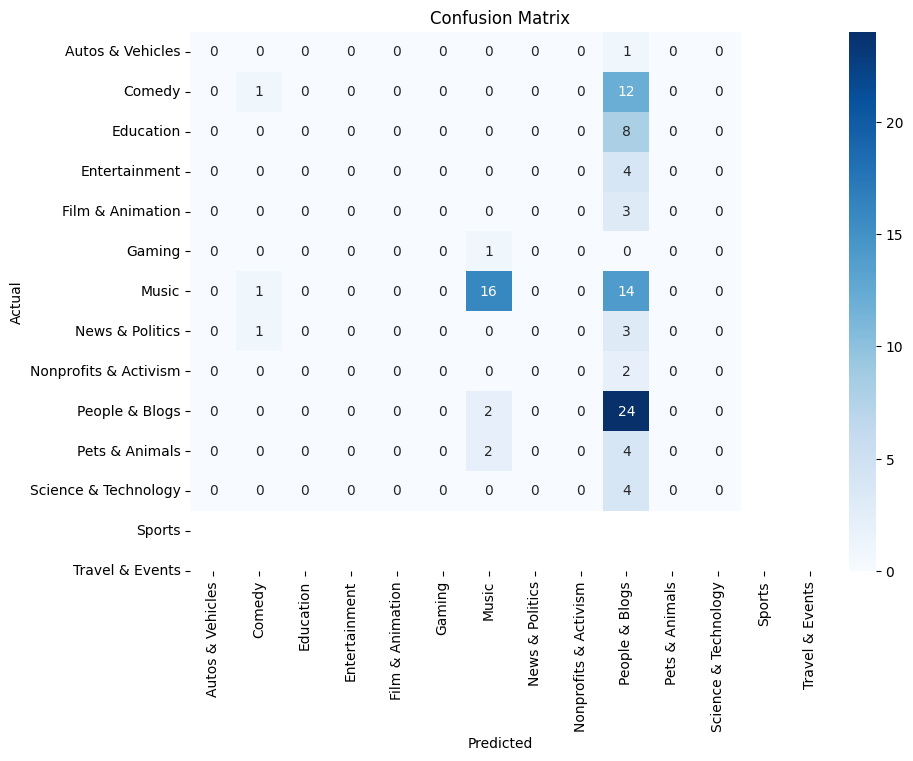

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Построение матрицы ошибок
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

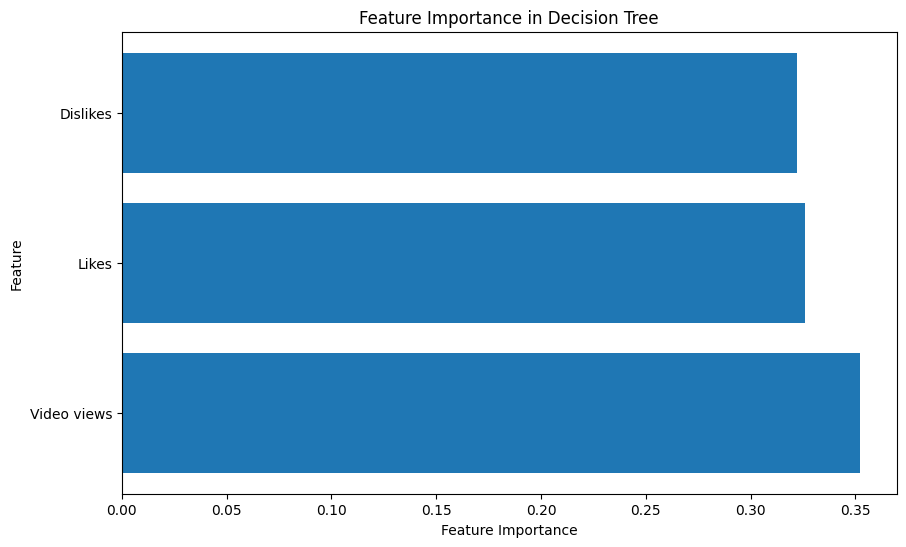

In [14]:
import numpy as np

# Получение важности признаков
feature_importances = model_tree.feature_importances_

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.show()

In [16]:
from sklearn.tree import export_graphviz
import graphviz

# Очистка имен классов (замена & на and)
class_names_fixed = [name.replace("&", "and") for name in model_tree.classes_]

# Экспорт дерева в формат DOT
dot_data = export_graphviz(model_tree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=class_names_fixed,  
                           filled=True, rounded=True,  
                           special_characters=True)

# Визуализация
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Сохраняем дерево в файл
graph.view()  # Открываем визуализацию

'decision_tree.pdf'

In [17]:
from sklearn.tree import export_text

# Вывод текстового представления дерева
tree_rules = export_text(model_tree, feature_names=list(X.columns))
print(tree_rules)

|--- Likes <= 0.08
|   |--- Video views <= -0.43
|   |   |--- Likes <= -0.21
|   |   |   |--- Dislikes <= -0.21
|   |   |   |   |--- Likes <= -0.22
|   |   |   |   |   |--- Likes <= -0.25
|   |   |   |   |   |   |--- Dislikes <= -0.22
|   |   |   |   |   |   |   |--- class: People & Blogs
|   |   |   |   |   |   |--- Dislikes >  -0.22
|   |   |   |   |   |   |   |--- class: Entertainment
|   |   |   |   |   |--- Likes >  -0.25
|   |   |   |   |   |   |--- Video views <= -0.43
|   |   |   |   |   |   |   |--- Video views <= -0.45
|   |   |   |   |   |   |   |   |--- Dislikes <= -0.22
|   |   |   |   |   |   |   |   |   |--- class: Music
|   |   |   |   |   |   |   |   |--- Dislikes >  -0.22
|   |   |   |   |   |   |   |   |   |--- Dislikes <= -0.21
|   |   |   |   |   |   |   |   |   |   |--- class: News & Politics
|   |   |   |   |   |   |   |   |   |--- Dislikes >  -0.21
|   |   |   |   |   |   |   |   |   |   |--- class: Travel & Events
|   |   |   |   |   |   |   |--- Video views > 

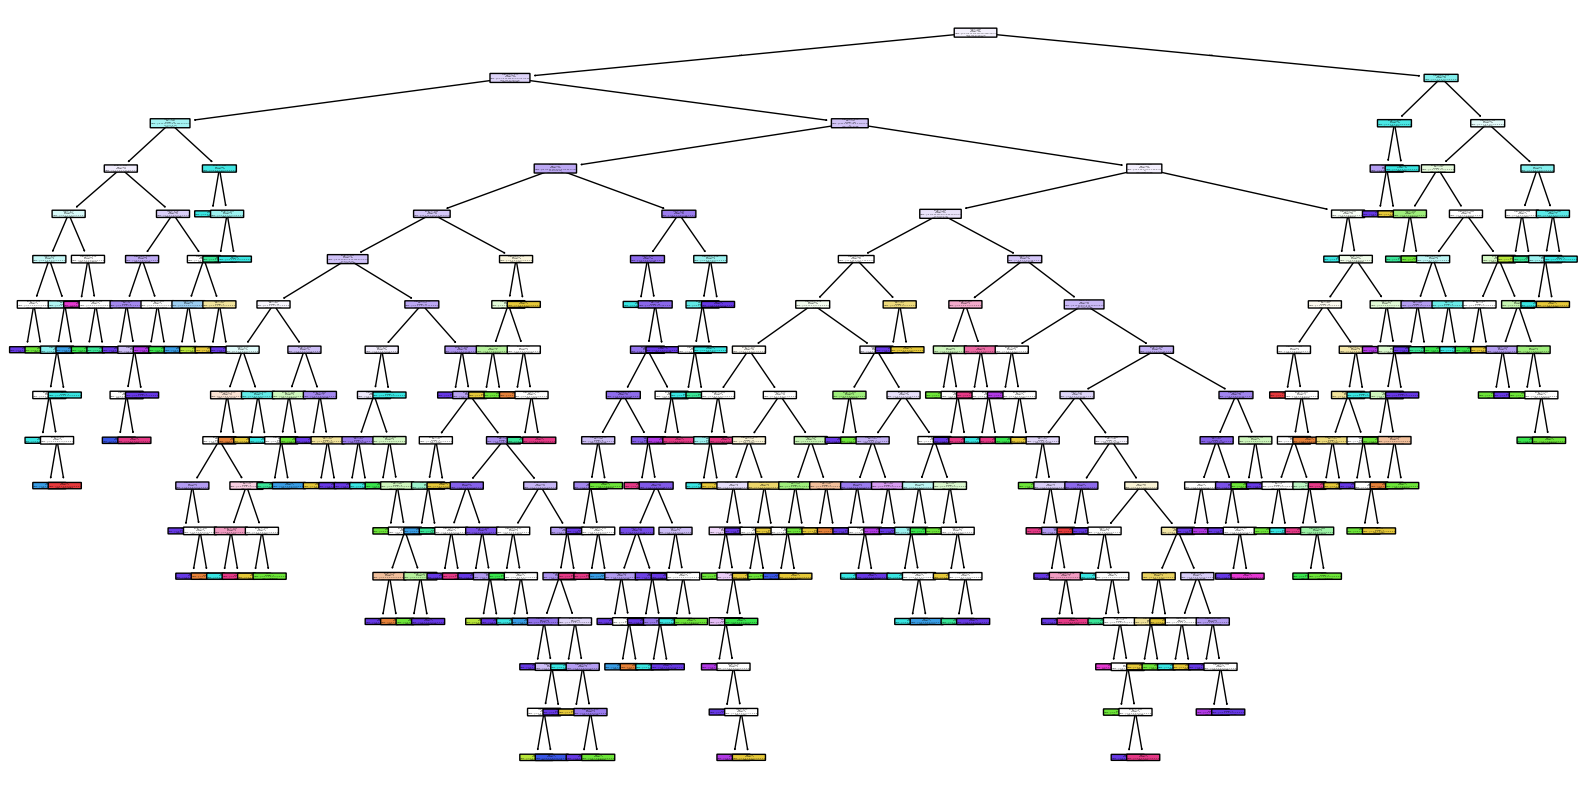

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Визуализация дерева
plt.figure(figsize=(20, 10))
plot_tree(model_tree, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.show()